In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# train test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

# StandardScaler

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transfrom train and test tests
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [5]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [6]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns =x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns =x_test.columns)

In [23]:
round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [8]:
round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling


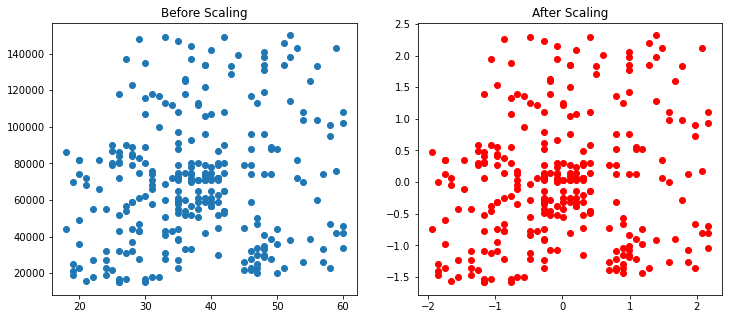

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5 ))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title("After Scaling")
plt.show()

# Effect of Outlier

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\91844\AppData\Local\Temp\ipykernel_11844\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [12]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


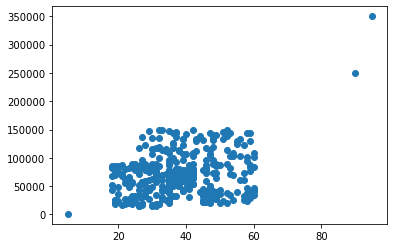

In [13]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

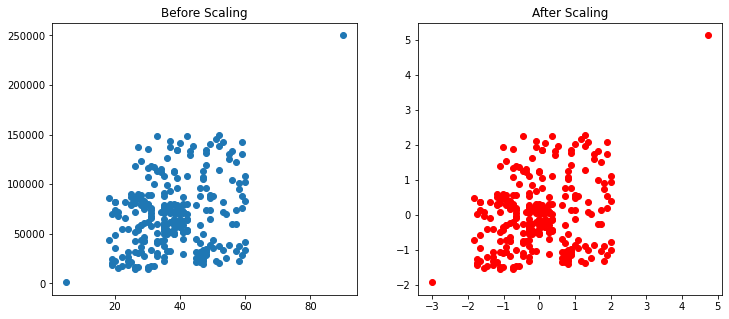

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [18]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,14.52649733,29.69911765,48.91221855
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,49.693429,32.204208,154.307253
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN


In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
14.52649733    890
29.69911765    890
48.91221855    890
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  14.52649733  1 non-null      float64
 13  29.69911765  1 non-null      float64
 14  48.91221855  1 non-null      float64
dtypes: float64(5), int64(5), object(5)
memory usage: 104.5+ KB


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test

(     Age  EstimatedSalary
 179   31            34000
 219   59           143000
 302   37           137000
 49    31            89000
 241   38            59000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [282 rows x 2 columns],
      Age  EstimatedSalary
 199   35            22000
 327   42            75000
 59    32           117000
 78    28            87000
 65    24            58000
 ..   ...              ...
 96    35            25000
 144   34            25000
 89    35            50000
 353   37            57000
 21    47            49000
 
 [121 rows x 2 columns])